In [487]:
#load necessary library
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy import linalg
%matplotlib inline

In [488]:
#generate data 
with open('RedWine_HW7.txt','r') as f:
    features = []
    lines=f.readline()
    featues = lines.split(';')
    for i in range(13):
        features.append(featues[i]) 
r_data = np.genfromtxt('RedWine_HW7.txt',skip_header=1)
w_data = np.genfromtxt('WhiteWine_HW7.txt',skip_header=1)

<function matplotlib.pyplot.imshow>

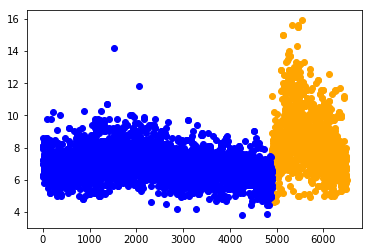

In [489]:
plt.figure
x1 = range(0,4898,1)
x2 = range(4898,4898+1599,1)
plt.scatter(x2,r_data[:,0],color='orange')
plt.scatter(x1,w_data[:,0],color='blue')
plt.imshow

In [490]:
# the first and second row storage the within group variance of each feature 
# the third row storage the between group variance of each feature
operator = np.zeros([3,13])
rdata = r_data
wdata = w_data
for i in range(13):
    # caculate the within group variance  c1=red wine   c2 = white wine
    c1 = np.cov(rdata[:,i])
    c2 = np.cov(wdata[:,i])
    #place the within variance into matrix
    operator[0,i] = c1
    operator[1,i] = c2
    #compute between variance of each feature of wine
    mu0 = (sum(rdata[:,i])+sum(wdata[:,i]))/(4898+1599)
    s1 = 1599/(1599+4898)*(np.mean(rdata[:,i])-mu0)*(np.mean(rdata[:,i])-mu0)
    s2 = 4898/(1599+4898)*(np.mean(wdata[:,i])-mu0)*(np.mean(wdata[:,i])-mu0)
    Sb = s1 + s2
    #storage s1 and s2 into operator
    operator[2,i] = Sb

In [492]:
#use FFS to select the best features
def FFS(covariance_matrix):
    dl = covariance_matrix
    best_list=[]
    dlist = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    cv = dl
    trace_ratio=[]
    ratio=[]
    for n in range(13):
        NumFeatures = n+1
        ratio.clear()
        for m in range(13-n):
            mum = sum(sum(cv[0,[best_list+[dlist[m]]]])+sum(cv[1,[best_list+[dlist[m]]]]))
            child = sum(sum(cv[2,[best_list+[dlist[m]]]]))
            ratio.append(child/mum)
        #print(ratio,n)
        BestValue = max(ratio)
        Position = ratio.index(BestValue)
        best_list.append(dlist[Position])
        np.delete(cv,dlist[Position],1)
        del dlist[Position]
        trace_ratio.append(BestValue)
    return trace_ratio,best_list
#def BFS(covariance_matrix):
    

In [493]:
def fisher(A, B):
    group = np.zeros([13,3])
    for i in range(13):
        sum1 = 0
        Sw1 = np.cov(A[:,i])
        Sw2 = np.cov(B[:,i])
        group[i,0] = Sw1
        group[i,1] = Sw2
        mu = np.mean(np.hstack((A[:,i],B[:,i])))
        l = [len(A[:,i]),len(B[:,i])]
        for n in range(len(A[:,i])):
            e = A[n,i]-mu
            sum1 =sum1 + e**2
        sb1 = (l[0]/sum(l))*sum1
        sum2 = 0
        for n in range(len(B[:,i])):
            e = B[n,i]-mu
            sum2 =sum2 + e**2
        sb2 = (l[1]/sum(l))*sum2
        Sb = sb1 + sb2
        group[i,2] = Sb
    return group

In [494]:
1599/(1599+4898)*134+4898/(1599+4898)*412.130310188

343.67866081280954

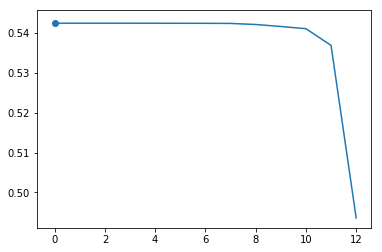

In [495]:
trace,best_list = FFS(operator)
plt.plot(trace)
plt.scatter(trace.index(max(trace)),max(trace))

In [496]:
nn = operator[0,1]+operator[1,1]
mm = operator[2,1]

In [497]:
print(mm/nn)

0.273729118073


In [498]:
lists=[1,2,3,4,5,6]
lists.clear()

In [499]:
print(np.mean(rdata[:,0]))

8.3196372733
